In [1]:
from matplotlib import pyplot as plt

In [94]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
%matplotlib inline

In [4]:
index2note = {0: 'G#4', 1: 'E-4', 2: 'F4', 3: '__', 4: 'G-5', 5: 'C4', 6: 'A#4', 7: 'D#4', 8: 'C#4', 9: 'D#5', 10: 'E5', 11: 'G5', 12: 'E-5', 13: 'END', 14: 'B-4', 15: 'E#4', 16: 'D-5', 17: 'F#4', 18: 'E#5', 19: 'START', 20: 'A4', 21: 'G4', 22: 'E4', 23: 'A5', 24: 'F#5', 25: 'A-4', 26: 'B4', 27: 'A-5', 28: 'G-4', 29: 'D4', 30: 'C#5', 31: 'C5', 32: 'D5', 33: 'rest', 34: 'F5', 35: 'C-5', 36: 'F-5', 37: 'B#4', 38: 'G#5', 39: 'F-4', 40: 'D-4', 41: 'B--4', 42: 'B--5', 43: 'E--5', 44: 'B#3', 45: 'F##4', 46: 'C##4', 47: 'G##4', 48: 'C##5', 49: 'D##4', 50: 'F##5', 51: 'D##5', 52: 'A--5', 53: 'E--4', 54: 'A--4'}


In [5]:
ordered_notes = ['__',
 'B#3','C4', 'C#4','D-4','C##4', 'D4', 'E--4', 'D#4','E-4', 'D##4',  'E4',  'F-4', 'E#4','F4', 'F#4',  'G-4', 'F##4',  'G4', 'A--4',
 'G#4', 'A-4','G##4','A4', 'B--4','A#4', 'B-4', 'B4','C-5',
  'B#4','C5',  'C#5', 'D-5', 'C##5', 'D5', 'E--5', 'D#5', 'E-5', 'D##5', 'E5','F-5',   'E#5', 'F5','F#5','G-5',  'F##5', 'G5',  'A--5',
 'G#5', 'A-5','A5', 'B--5',
 'rest',
'START', 'END'
]
ordered_notes.reverse()

In [6]:
df = pd.read_csv('results/2017_08_26T19_43_18/predictions.csv', header=None, names=['note_index', 'time_index', 'value', 'model_index'])
df['note'] = (df['note_index'].apply((lambda x:index2note[x])))
df['time_index'] = (df['time_index'] - 15) / 4
df.head()

,note_index,time_index,value,model_index,note
0,0,0.0,9.718981e-12,0,G#4
1,1,0.0,6.861227e-24,0,E-4
2,2,0.0,9.999990e-01,0,F4
3,3,0.0,1.106627e-17,0,__
4,4,0.0,2.324174e-28,0,G-5


In [7]:
df0 = df[df['model_index'] == 0]
df0.head()

,note_index,time_index,value,model_index,note
0,0,0.0,9.718981e-12,0,G#4
1,1,0.0,6.861227e-24,0,E-4
2,2,0.0,9.999990e-01,0,F4
3,3,0.0,1.106627e-17,0,__
4,4,0.0,2.324174e-28,0,G-5


In [8]:
matrix = df0.pivot(index='note', columns='time_index', values='value')
matrix = matrix.reindex(ordered_notes)
matrix.head()

time_index,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,13.75,14.0,14.25,14.5,14.75,15.0,15.25,15.5,15.75,16.0
note,,,,,,,,,,,,,,,,,,,,,
END,1.039245e-34,8.139400e-09,2.347268e-06,2.308152e-10,2.676665e-06,1.098217e-07,3.851972e-06,3.662992e-10,2.786968e-06,2.908968e-10,...,8.273803e-07,9.390681e-03,1.467391e-03,1.197078e-03,9.291396e-06,7.794224e-02,9.107802e-03,1.971906e-03,3.684608e-04,9.999999e-01
START,3.817427e-21,6.075869e-10,8.863495e-11,2.010541e-12,3.228807e-07,1.397832e-10,6.403494e-10,6.235412e-12,5.467737e-07,2.601044e-11,...,4.684926e-10,2.335598e-05,5.654591e-10,3.148946e-09,1.662576e-10,1.580636e-07,1.398904e-10,9.337597e-06,8.200575e-08,1.133467e-10
rest,1.641215e-40,7.769442e-20,2.181545e-13,5.384303e-20,8.349998e-13,4.694781e-20,7.871656e-14,1.247751e-20,7.308763e-14,2.448647e-19,...,1.440650e-19,1.978752e-12,7.041712e-17,2.359503e-14,1.117154e-19,4.174254e-13,1.135186e-21,3.160077e-16,2.658990e-21,4.757172e-24
B--5,0.000000e+00,1.194004e-34,3.177844e-23,1.805292e-20,4.329210e-18,2.510525e-32,6.513798e-24,3.545950e-21,2.954700e-20,1.963267e-22,...,7.782622e-18,2.427252e-17,1.238647e-26,2.316488e-19,9.055485e-20,1.298285e-18,2.700696e-32,1.569066e-25,3.727976e-25,4.203895e-45
A5,0.000000e+00,1.967734e-16,7.251498e-11,1.241150e-14,2.039084e-08,5.130628e-18,5.067221e-11,7.862137e-15,5.760675e-09,1.034592e-15,...,1.414997e-08,2.373470e-04,1.434327e-12,1.877706e-05,1.143097e-09,3.138118e-04,2.135107e-16,1.838142e-08,4.280550e-14,3.319568e-34


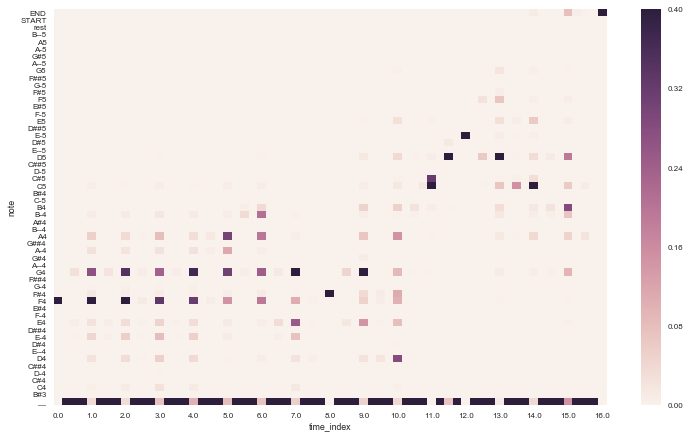

In [13]:
figure = plt.gcf()
ax1 = figure.add_axes([0.,0.,1.2,1.0])
sns.set(font_scale=0.8)
plt.yticks(rotation=90)

ax = sns.heatmap(matrix, vmin=0, vmax=0.4, ax=ax1, xticklabels=4)
figure

In [149]:
df.head()

,note_index,time_index,value,model_index,note
0,0,0.0,9.718981e-12,0,G#4
1,1,0.0,6.861227e-24,0,E-4
2,2,0.0,9.999990e-01,0,F4
3,3,0.0,1.106627e-17,0,__
4,4,0.0,2.324174e-28,0,G-5


In [28]:
df1 =  df[df['model_index'] == 1]
matrix0 = df0.pivot(index='note', columns='time_index', values='value')
matrix1 = df1.pivot(columns='note', index='time_index', values='value')
matrix0.head()

time_index,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,13.75,14.0,14.25,14.5,14.75,15.0,15.25,15.5,15.75,16.0
note,,,,,,,,,,,,,,,,,,,,,
A#4,1.116870e-14,3.324359e-17,7.119876e-10,3.500937e-11,2.771472e-06,2.593750e-15,8.293310e-11,3.020331e-12,3.100984e-07,1.468318e-09,...,5.940479e-11,8.943464e-05,1.747164e-08,9.414479e-08,3.165229e-12,1.276846e-05,4.163948e-07,4.647398e-06,1.420477e-11,2.353502e-13
A--4,2.964904e-37,0.000000e+00,3.101781e-37,4.938250e-38,3.801862e-14,0.000000e+00,3.911202e-38,1.859757e-39,2.422950e-15,5.016325e-36,...,1.572397e-41,6.139064e-19,7.654485e-29,3.323150e-30,1.298020e-39,1.084571e-19,5.307683e-28,1.210555e-29,2.764858e-37,7.339950e-37
A--5,0.000000e+00,9.090473e-34,3.362862e-19,3.147444e-23,8.704592e-21,2.951432e-28,2.962954e-18,3.744520e-24,6.970687e-23,4.105137e-21,...,2.061492e-23,2.242104e-23,1.851654e-22,2.808252e-16,2.808458e-21,7.506703e-20,1.101588e-35,1.384288e-27,2.014988e-30,0.000000e+00
A-4,2.943411e-09,1.602017e-11,2.324441e-05,1.813068e-05,2.512512e-02,1.279616e-11,1.529338e-05,1.022070e-05,2.169994e-02,1.266645e-07,...,4.384623e-07,1.162716e-04,6.561359e-09,6.107819e-06,1.574951e-07,1.153105e-04,1.705937e-07,1.443999e-05,2.792565e-08,7.926222e-12
A-5,2.055228e-20,1.208447e-18,1.902864e-10,6.516927e-11,1.421795e-08,9.843585e-19,5.790117e-11,6.183175e-11,3.674203e-09,1.241237e-13,...,8.460912e-09,2.783574e-06,9.237251e-13,4.390719e-07,1.333764e-09,3.197767e-06,2.472518e-14,8.942554e-11,2.789369e-13,7.097700e-21


In [88]:
for name, group in df.groupby('time_index'):
    print(name)
    print(group.head())
    break

0.0
   note_index  time_index         value  model_index note
0           0         0.0  9.718981e-12            0  G#4
1           1         0.0  6.861227e-24            0  E-4
2           2         0.0  9.999990e-01            0   F4
3           3         0.0  1.106627e-17            0   __
4           4         0.0  2.324174e-28            0  G-5


In [218]:
def get_pq(df):
    
    p = df[df['model_index'] == 0]
    p = p.set_index(['note_index']).value

    q = df[df['model_index'] == 1]
    q = q.set_index(['note_index']).value
    return p, q

In [219]:
def KL(p, q):
    eps = 1e-10
    return (p * np.log((p + eps) / (q + eps))).sum()

In [220]:
def Jeffreys(p, q):
    return KL(p, q) + KL(q, p)

In [221]:
def reversed_KL(p, q):
    return KL(q, p)

In [222]:
def JS(p, q):
    m = (p + q) / 2
    return (KL(p, m) + KL(q,m))

In [226]:
def get_group_div(fun, sqrt):
    def kl_group(df):
        p, q = get_pq(df)
        if sqrt:
            return np.sqrt(fun(p, q))
        else:
            return fun(p, q)
    return kl_group

In [227]:
grouped = df.groupby('time_index')
kl_series = grouped.apply(get_group_div(JS, sqrt=True))

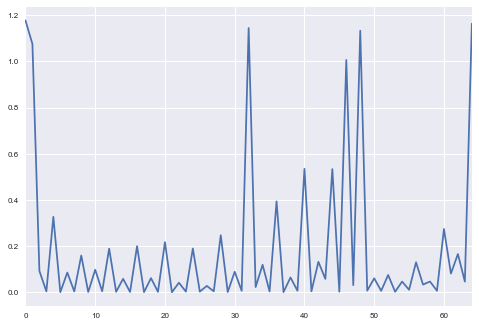

In [228]:
sns.tsplot(kl_series)

In [245]:
grouped = df.groupby('time_index')

kl_series = [grouped.apply(get_group_div(div, sqrt=True)).rename(div.__name__)
                 for div in [KL, JS, Jeffreys, reversed_KL]
            ]
kl_series = pd.concat(kl_series, axis=1)

In [248]:
kl_series.head()

,KL,JS,Jeffreys,reversed_KL
time_index,,,,
0.00,3.547349,1.177390,5.967314,4.798453
0.25,1.678795,1.075440,4.731121,4.423251
0.50,0.142745,0.092320,0.192846,0.129667
0.75,0.006726,0.003918,0.008407,0.005043
1.00,0.436984,0.326645,0.688222,0.531690


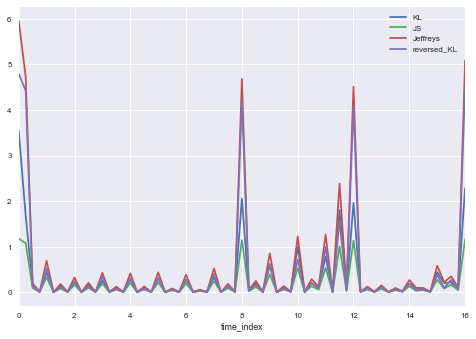

In [249]:
kl_series.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb966a4b1d0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb966e18400>]], dtype=object)

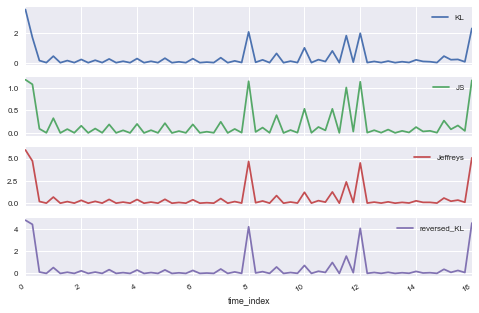

In [252]:
kl_series.plot(subplots=True, layout=(4, 1))